In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
#q4
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [4]:
#q1
print(df['Age'].mean(), df['Age'].median(), df['Age'].mode()[0])
print(df['Fare'].mean(), df['Fare'].median(), df['Fare'].mode()[0])

29.69911764705882 28.0 24.0
32.2042079685746 14.4542 8.05


In [5]:
#q3
age_range = df['Age'].max() - df['Age'].min()
fare_range = df['Fare'].max() - df['Fare'].min()

In [6]:
age_variance = df['Age'].var()
age_std_dev = df['Age'].std()
fare_variance = df['Fare'].var()
fare_std_dev = df['Fare'].std()


In [7]:
age_iqr = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
fare_iqr = df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25)


In [8]:
print(f"Age Range: {age_range}, Age Variance: {age_variance}, Age Std Dev: {age_std_dev}, Age IQR: {age_iqr}")
print(f"Fare Range: {fare_range}, Fare Variance: {fare_variance}, Fare Std Dev: {fare_std_dev}, Fare IQR: {fare_iqr}")

Age Range: 79.58, Age Variance: 211.0191247463081, Age Std Dev: 14.526497332334044, Age IQR: 17.875
Fare Range: 512.3292, Fare Variance: 2469.436845743117, Fare Std Dev: 49.693428597180905, Fare IQR: 23.0896


In [9]:
#q5,q6
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
print(missing_data)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

Age         177
Cabin       687
Embarked      2
dtype: int64


In [10]:
df.drop(columns=['Cabin'], inplace=True)
df.dropna(inplace=True)

In [12]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [13]:
#q7
missing_data = df.isnull().sum()

missing_data = missing_data[missing_data > 0]
missing_percentage = (missing_data / len(df)) * 100

missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print(missing_info)

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


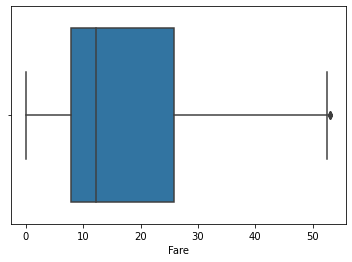

In [16]:
#q8
sns.boxplot(x=df['Fare'])
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Fare'] < Q1 - 1.5 * IQR) | (df['Fare'] > Q3 + 1.5 * IQR)]
df = df[~df.index.isin(outliers.index)]

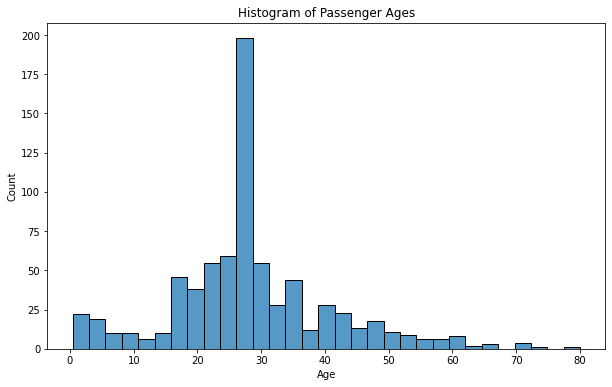

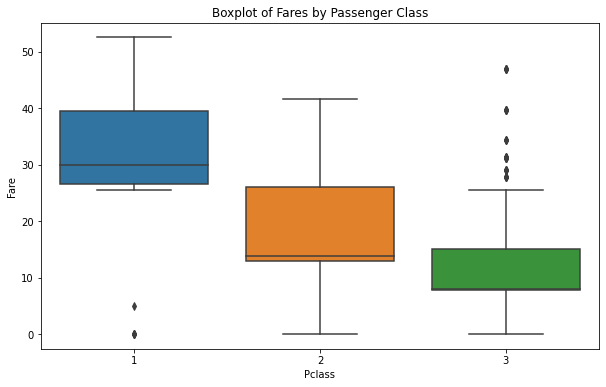

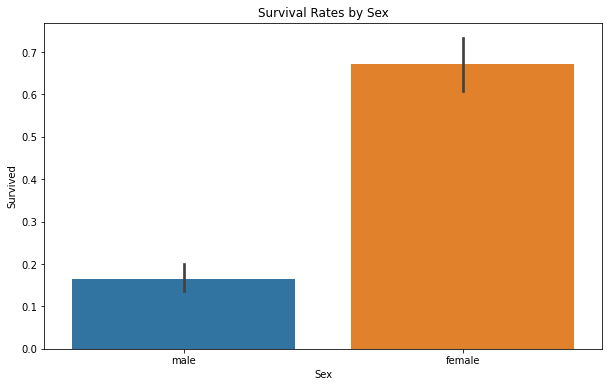

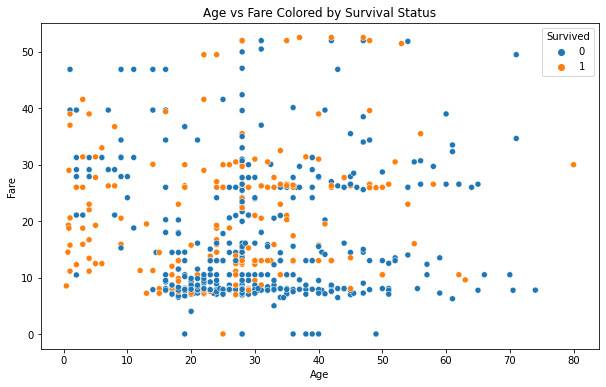

In [17]:
#q9
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=False)
plt.title('Histogram of Passenger Ages')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Boxplot of Fares by Passenger Class')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rates by Sex')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Age vs Fare Colored by Survival Status')
plt.show()

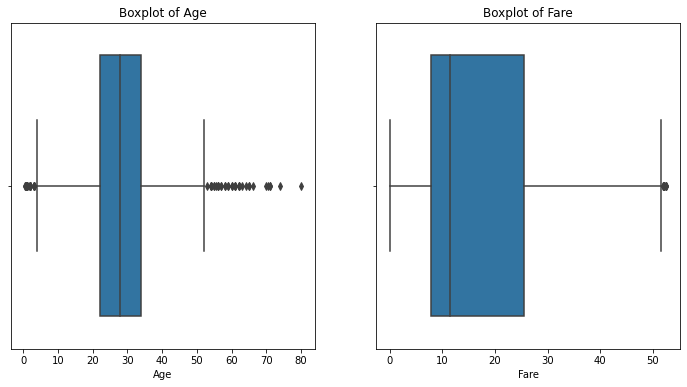

In [18]:
#q10
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')

plt.show()

In [19]:
#q11
age_lower_bound = df['Age'].quantile(0.05)
age_upper_bound = df['Age'].quantile(0.95)


df['Age'] = df['Age'].apply(lambda x: age_upper_bound if x > age_upper_bound else (age_lower_bound if x < age_lower_bound else x))


C:\Users\pedda\AppData\Local\Temp/ipykernel_6444/3679030833.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Fare'] = df['Fare'].apply(lambda x: x if x == 0 else pd.np.log(x))


C:\Users\pedda\AppData\Local\Temp/ipykernel_6444/2102109395.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Fare'] = df['Fare'].apply(lambda x: x if x == 0 else pd.np.log(x))


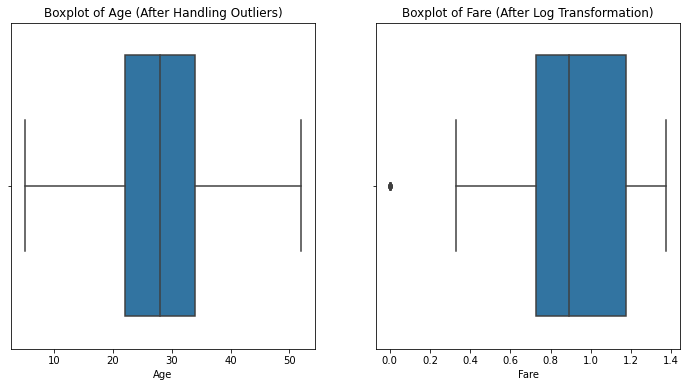

In [21]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age (After Handling Outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare (After Log Transformation)')

plt.show()

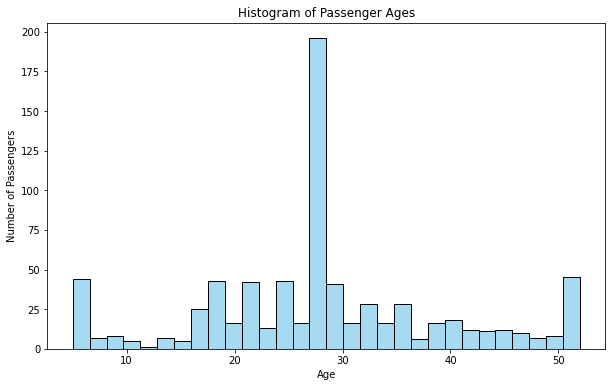

In [22]:
#q12

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=False, bins=30, color='skyblue')
plt.title('Histogram of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()


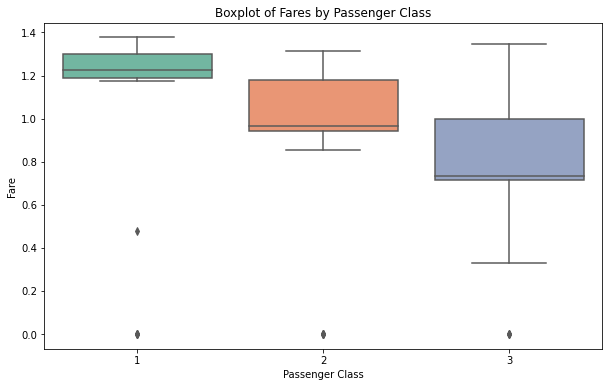

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2')
plt.title('Boxplot of Fares by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

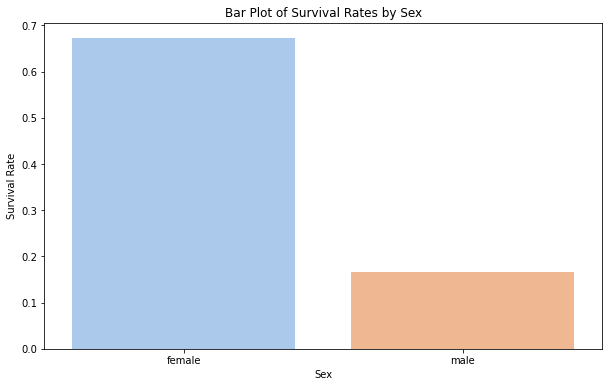

In [24]:
survival_rates = df.groupby('Sex')['Survived'].mean()

# Plot bar plot of survival rates by sex
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rates.index, y=survival_rates.values, palette='pastel')
plt.title('Bar Plot of Survival Rates by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

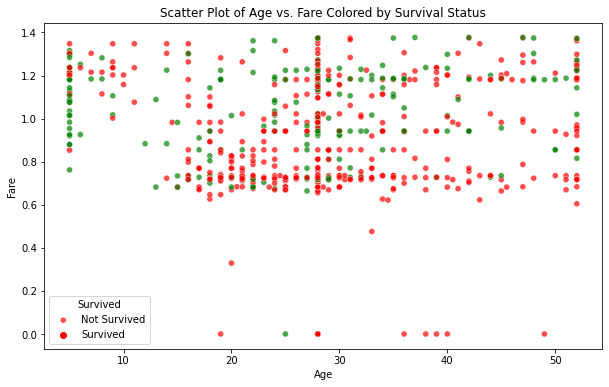

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette={0: 'red', 1: 'green'}, alpha=0.7)
plt.title('Scatter Plot of Age vs. Fare Colored by Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='best', labels=['Not Survived', 'Survived'])
plt.show()